# Python and jupyter notebooks

In this short tutorial you can find the most essential and basic usages of libraries used in the main part of the workshop. If you do not have previous experience with `python` do not worry - it is quite simple, and we will not use very complex functionalities. If needed, have a look on the official python [tutorial](https://docs.python.org/3/tutorial/introduction.html).

What you have opened is a `jupyter notebook`. It has cells that can be executed by pressing `shift`+`enter`. The jupyter (server) performes the commands in the cell (also taking into account previously executed commands).

If a variable is put in the last line of the cell, jupyter will try to print it out (sometimes this may result in strange output ;-) )

In [1]:
x = 2
x

2

Now, if we try to use previously undefined variable, we will get en error:

In [2]:
# this is comment
x + y

NameError: name 'y' is not defined

Variables can be also printed in the middle of the cell, using `print()` function:

In [3]:
x = 2
print(x)
x = x + 2
x

2


4

Jupyter notebooks are very useful for prototyping and performing step-by-step analysis. Now, lets define a simple function:

In [4]:
# def my_function(x: float) -> float: # example how to indicate type of variables
def my_function(x):
    result = x + x ** 2 + 1
    return result

In [5]:
x = 2
y = my_function(x)
print(y)

7


# Numpy package

One of the most useful packages in solving numerical problems in python is `numpy`. Most commonly it is imported as `np` for short. In our workshop we will mainly use the `array` class to perform different kinds of manipulations.

In [6]:
import numpy as np

There are several ways of initializing an array. The simplest one is to create one from an existing list or tuple:

In [7]:
x = np.array([1., 2., 3., 4.])

The arrays are sliced in a typical pythonic way:

In [8]:
print(x[0])
print(x[2:])
print(x[-1])

1.0
[3. 4.]
4.0


We can perform all possible mathematical (almost) operations on the arrays:

In [9]:
2 * x**2 + 2.0

array([ 4., 10., 20., 34.])

Numpy has many of the methods implemented to work on arrays:

In [10]:
print(np.sin(x))
print(np.exp(x))
print(np.mean(x))
print(np.std(x))

[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
[ 2.71828183  7.3890561  20.08553692 54.59815003]
2.5
1.118033988749895


We can also perform the operations using another array:

In [11]:
y = np.array([2., 2., 2., 2.])

print(x + y)
print(x * y)
print(x ** y)

[3. 4. 5. 6.]
[2. 4. 6. 8.]
[ 1.  4.  9. 16.]


One of the most important things are logical operations:

In [12]:
z = np.array([[1., 1., 1.], [2., 2., 3.], [3., 4., 5.]])

mask = z > 2.0
print("Mask:")
print(mask)
print("Elements satisfying condition:")
print(z[mask])

Mask:
[[False False False]
 [False False  True]
 [ True  True  True]]
Elements satisfying condition:
[3. 3. 4. 5.]


For more, have a look on the official [NumPy quickstart](https://numpy.org/devdocs/user/quickstart.html).

# Matplotlib
For plotting we will use `matplotlib` library. Below, we will find the most useful functions.

In [13]:
import matplotlib.pyplot as plt

In [14]:
x = np.arange(0., 2*np.pi, 0.01)
y = np.sin(x)
z = np.cos(x)

Simple plot, `plt.plot` where you specify both axis' data.

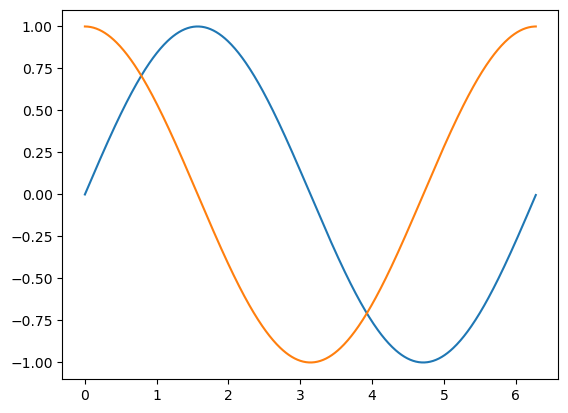

In [15]:
plt.plot(x, y) #blue line
plt.plot(x, z) #orange line

The plot is produced under the jupyter notebook cell - you should perform all 'plotting' stuff inside that cell, otherwise it may have no effect on the final plot.

To put some labels and legends, there are simple functions:

Text(0.5, 1.0, 'Plot title')

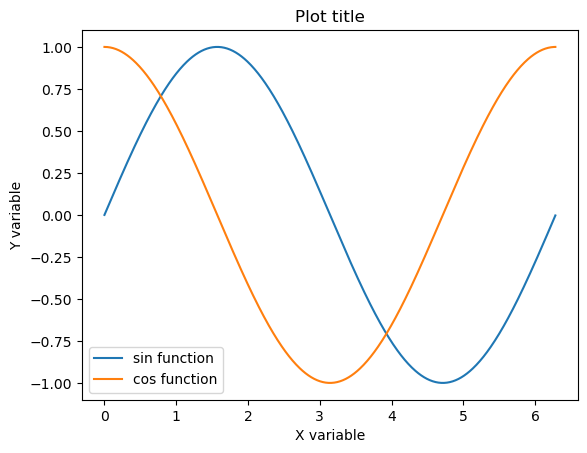

In [16]:
# new plot
plt.plot(x, y, label='sin function') #blue line
plt.plot(x, z, label='cos function') #orange line
plt.legend() # create leged box in the plot

plt.xlabel("X variable")
plt.ylabel("Y variable")
plt.title("Plot title")

Another useful plot type is `fill_between`, we will use it during our workshop, e.g. fill the space between sine and cosine functions:

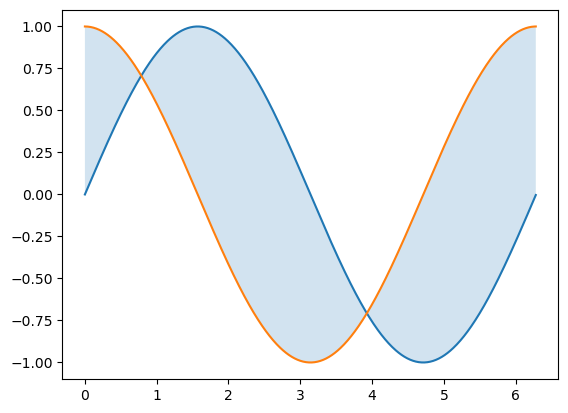

In [17]:
plt.plot(x, y)
plt.plot(x, z)

plt.fill_between(x, y, z, alpha=0.2)

Lastly, we will use some functions to show or plot the matrices. Begin with creating a random matrix with 100x100 entries from uniform distribution.

In [18]:
x = np.random.uniform(size=(100,100))

The simplest function to plot an 2D array is `imshow`:

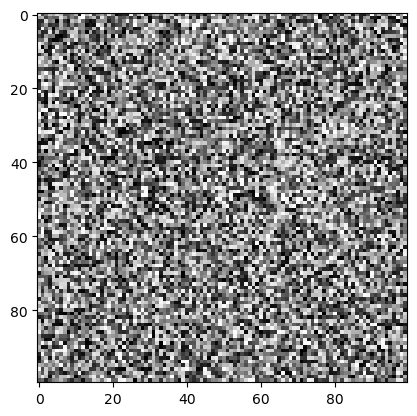

In [19]:
plt.imshow(x, cmap='gray')

Sometimes it is useful to plot the sparsity of the matrix. Suppose that the matrix has mainly 0 and some (small number) of nonzero entries. We can simply create such an example with:

In [20]:
z = np.copy(x)
z[z < 0.85] = 0.0

To visualise the sparsity, we use `spy` method:

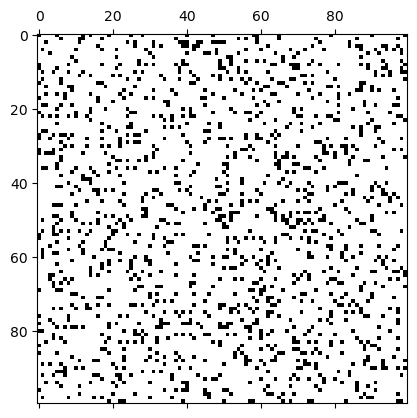

In [21]:
plt.spy(z)

Matplotlib possibilities go far beyond the scope of our workshop. Please refer to the official documentation and tutorials [here](https://matplotlib.org/stable/users/getting_started/).

# NetworkX

The library with plenty of useful functions to study graphs. Starting from graph generation from a numpy matrix, through graph visualization to graph analysis.

In [75]:
import networkx as nx

Start with a symmetric random matrix and use it as an adjacency for a new graph. NetworkX can create a graph from numpy array using `from_numpy_array` method.

In [76]:
x = np.random.randint(0, 2, size=(15,15))
x = (x + x.T) / 2
x[x<1] = 0
np.fill_diagonal(x, 0.0) # fill the diagonal with zeros

In [77]:
g = nx.from_numpy_array(x)

Now, we can draw the graph using `draw` function:

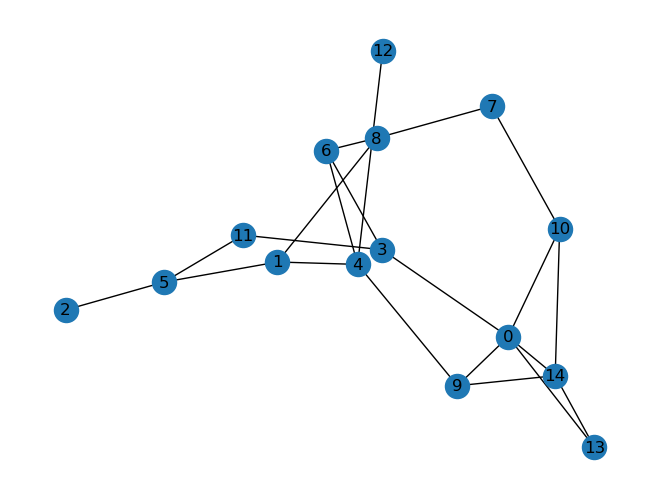

In [78]:
nx.draw(g, with_labels=True)

To get the adjacency matrix from the graph, we use `adjacency_matrix` (which return a sparse matrix, so we finally also use `todense` in order to get a typical numpy array).

In [79]:
nx.adjacency_matrix(g).todense()

/var/folders/dz/g_6b_1qs1zn9zntys_08nsg80000gn/T/ipykernel_42393/89543964.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(g).todense()


matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0.,

NetworkX has some pre-made classes of graphs, e.g. tree or cycle graphs:

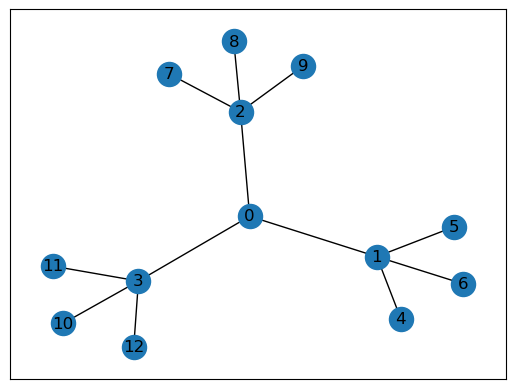

In [87]:
g1 = nx.balanced_tree(3, 2)
nx.draw_networkx(g1)

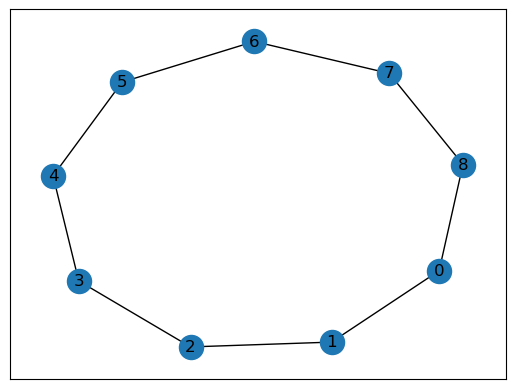

In [88]:
g2 = nx.cycle_graph(9, create_using=nx.Graph)
nx.draw_networkx(g2)

In our workshop we will use Watts-Strogatz graph, which has two parameters: $k$ and $\pi$. It starts as a ring where each node is connected to $k$ nearest neighbors. Then each connection can be rewired to any other node with probability $\pi$.

Examples:

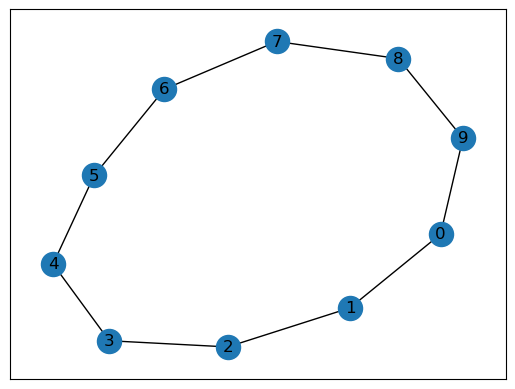

In [90]:
# 10 nodes, k=2, pi=0
g3 = nx.watts_strogatz_graph(10, 2, 0)
nx.draw_networkx(g3)

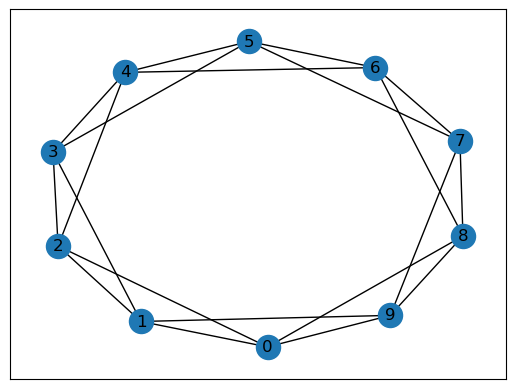

In [92]:
# 10 nodes, k=4, pi=0
g3 = nx.watts_strogatz_graph(10, 4, 0)
nx.draw_networkx(g3)

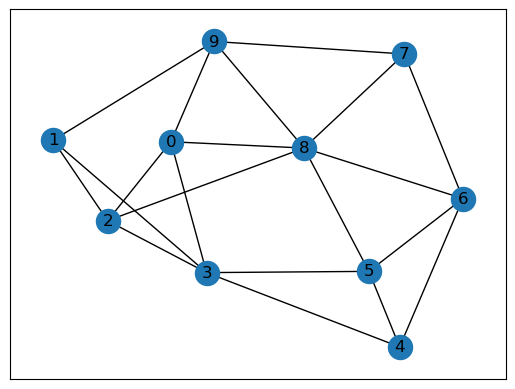

In [93]:
# 10 nodes, k=4, pi=0.25
g3 = nx.watts_strogatz_graph(10, 4, 0.25)
nx.draw_networkx(g3)

For more details, refer to the [official tutorial of NetworkX](https://networkx.org/documentation/stable/tutorial.html).